In [1]:
import neutromeratio
import pickle
from neutromeratio.constants import kT
import pandas as pd
from simtk import unit
from neutromeratio.plotting import plot_correlation_analysis
import matplotlib.pyplot as plt

_ColormakerRegistry()

[utils.py:141 - _init_num_threads()] NumExpr defaulting to 8 threads.


In [2]:
results = pickle.load(open('results.pickle', 'rb'))
results

,names,experimental_values,ddG_DFT,dE_ani1ccx,dG_ani1ccx
0,molDWRow_1005,-15.561610,-20.543257,-16.938337,-16.113664
1,molDWRow_1182,10.526971,17.872192,15.284594,19.579357
2,molDWRow_1001,-6.178874,-6.210793,-2.756238,-2.019350
3,molDWRow_1424,4.576944,4.166868,2.355331,6.958588
4,molDWRow_1411,-5.034638,2.091197,6.214064,7.242404
...,...,...,...,...,...
351,molDWRow_999,-12.128902,-9.647758,-6.314291,-5.176083
352,molDWRow_853,2.402896,29.655492,34.578261,26.085042
353,molDWRow_865,-1.373083,3.500246,4.109301,9.296766
354,molDWRow_81,-0.228847,5.280057,17.088677,7.496193


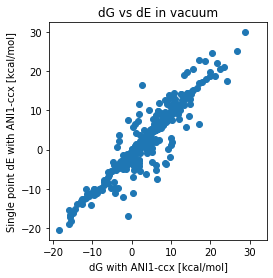

3.4105403206496225


In [3]:
x_list = []
y_list = []

for a in list(results.dG_ani1ccx):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.dE_ani1ccx):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

plt.scatter(x_list, y_list)
plt.title('dG vs dE in vacuum')
plt.xlabel('dG with ANI1-ccx [kcal/mol]')
plt.ylabel('Single point dE with ANI1-ccx [kcal/mol]')
plt.axis('square')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(x_list, y_list))
print(rmse)



             names  predicted_values  experimental_values             method
0    molDWRow_1005        -12.247109            -9.277240  B3LYP/aug-cc-pVTZ
1    molDWRow_1182         10.654722             6.275780  B3LYP/aug-cc-pVTZ
2    molDWRow_1001         -3.702638            -3.683610  B3LYP/aug-cc-pVTZ
3    molDWRow_1424          2.484128             2.728600  B3LYP/aug-cc-pVTZ
4    molDWRow_1411          1.246692            -3.001460  B3LYP/aug-cc-pVTZ
..             ...               ...                  ...                ...
351   molDWRow_999         -5.751626            -7.230790  B3LYP/aug-cc-pVTZ
352   molDWRow_853         17.679477             1.432515  B3LYP/aug-cc-pVTZ
353   molDWRow_865          2.086714            -0.818580  B3LYP/aug-cc-pVTZ
354    molDWRow_81          3.147769            -0.136430  B3LYP/aug-cc-pVTZ
355   molDWRow_995         -1.355251            -7.367220  B3LYP/aug-cc-pVTZ

[356 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

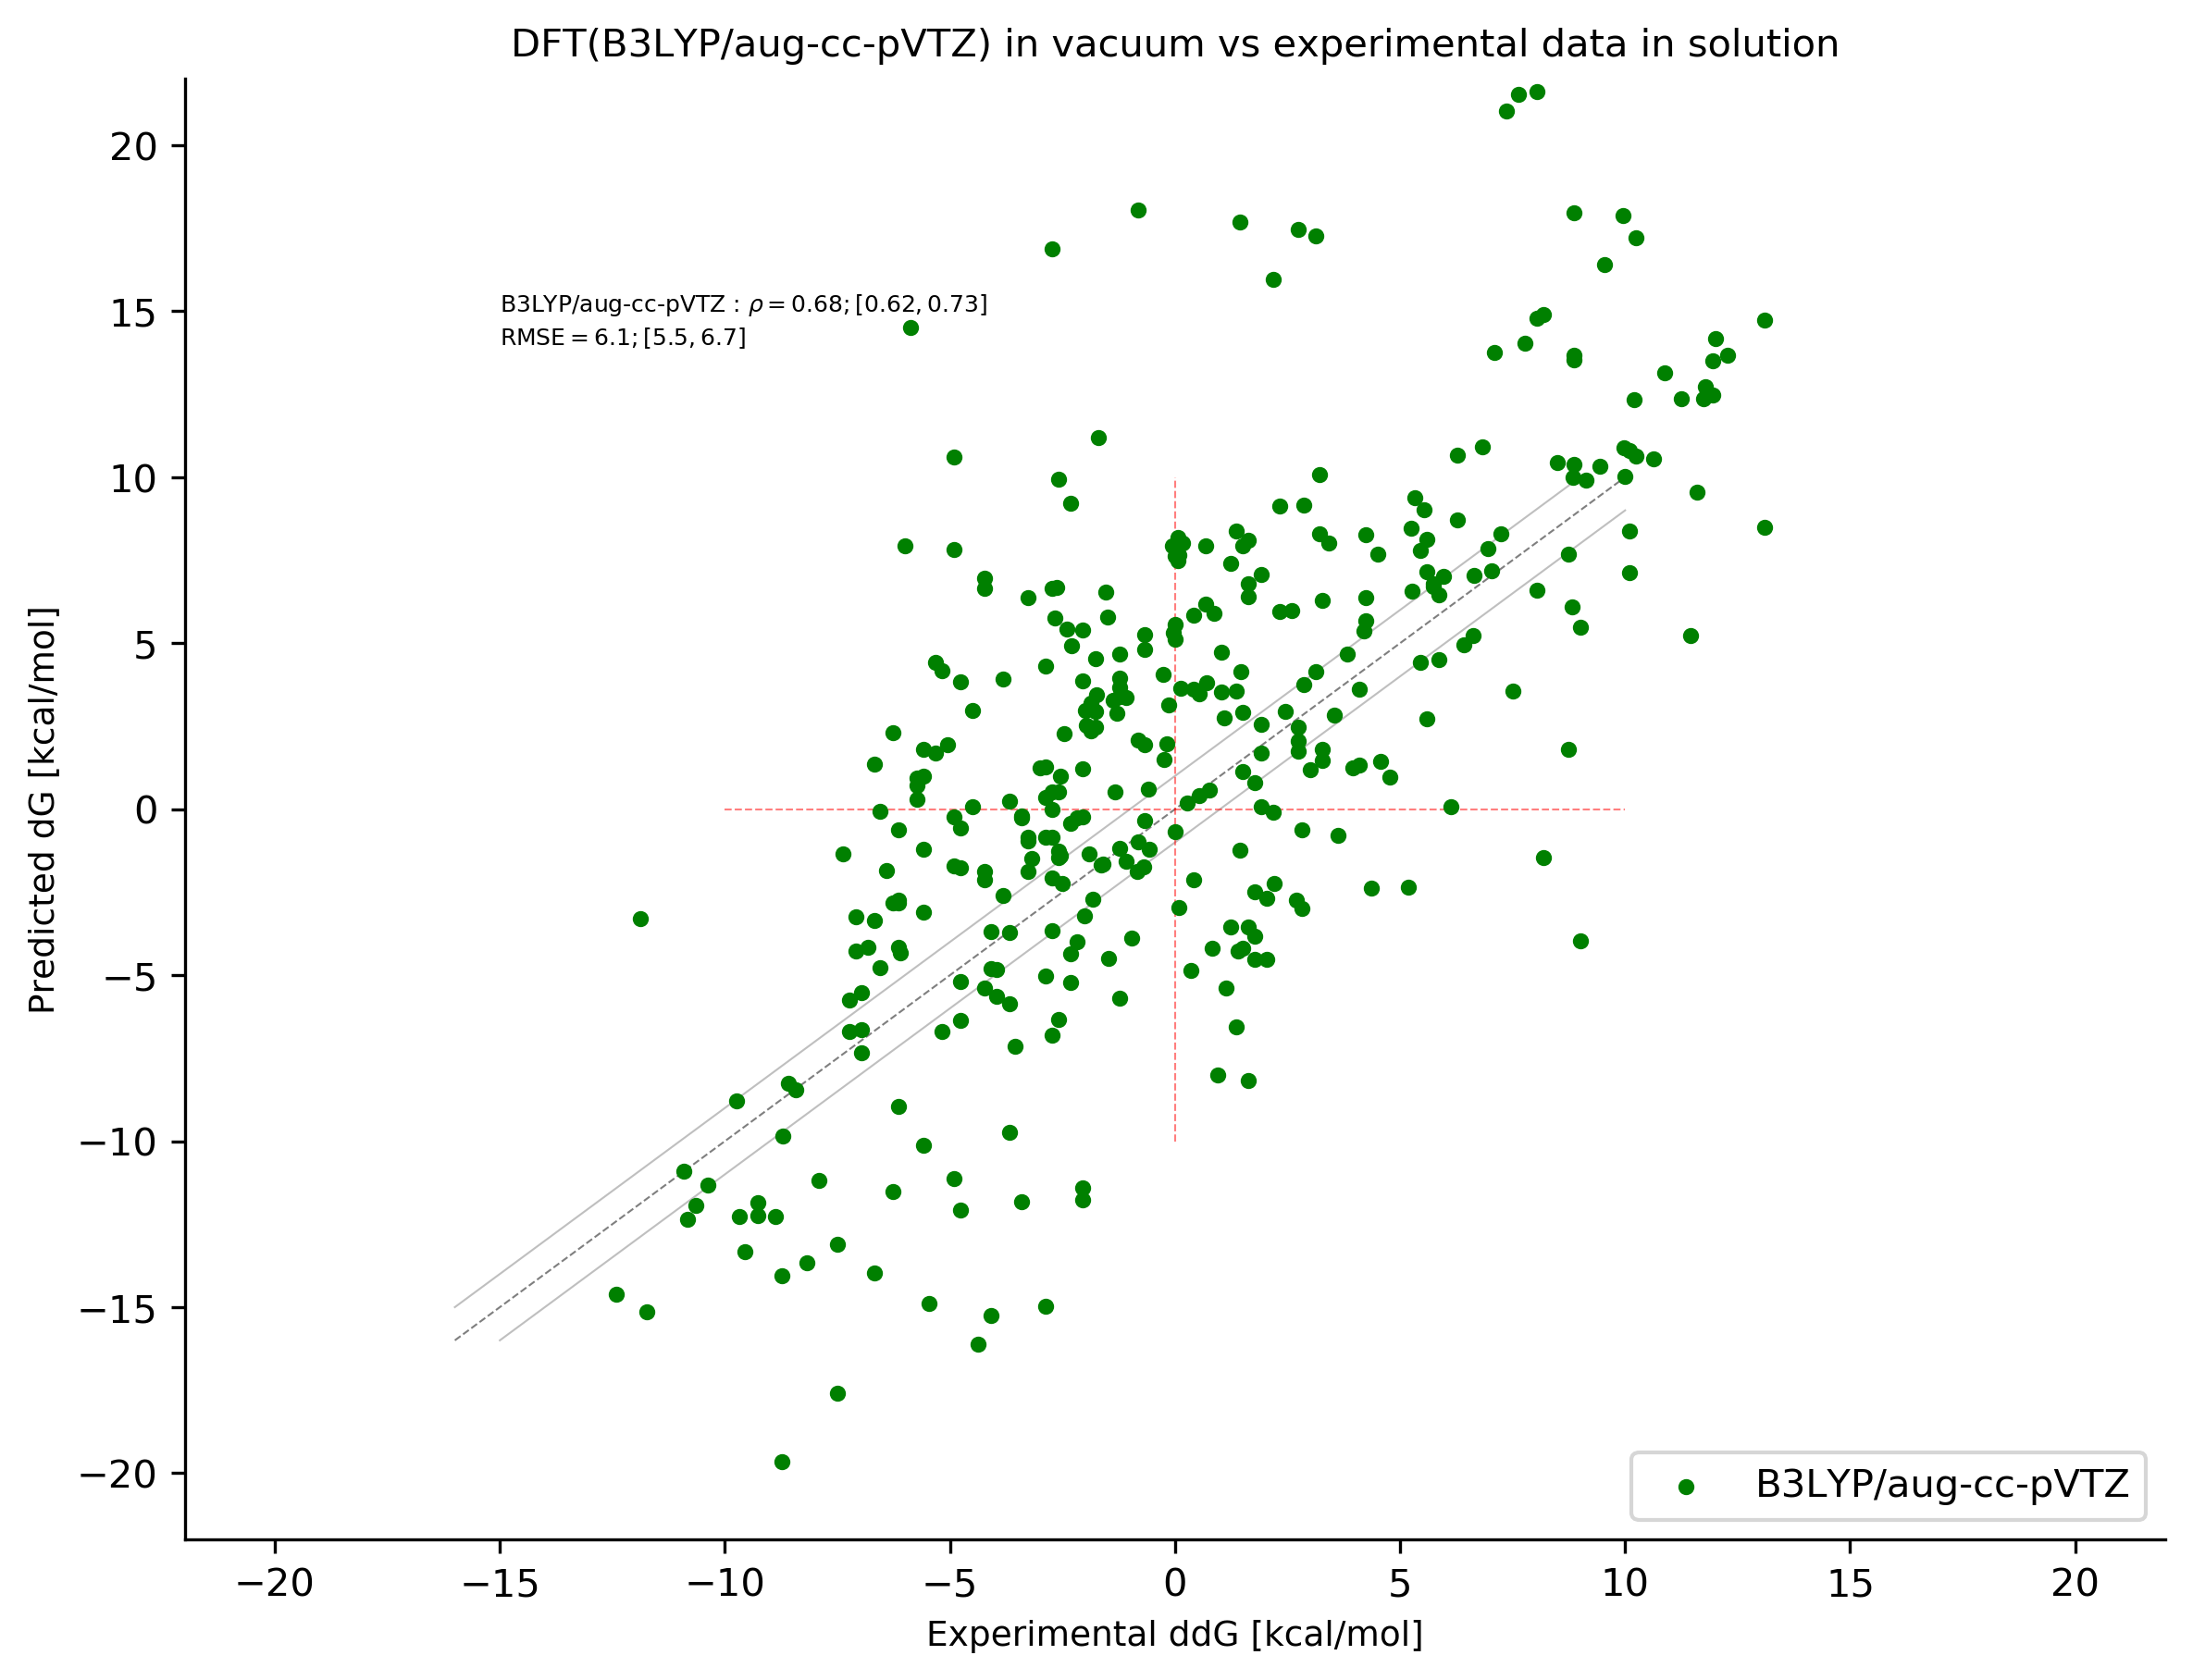

In [4]:
# dG ANI1-ccx vs experimental values
names = []
x_list = []
y_list = []

for a in list(results.ddG_DFT):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.experimental_values):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)


df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['B3LYP/aug-cc-pVTZ']*len(results.names))), columns =['names', 'predicted_values', 'experimental_values', 'method']) 
print(df)
f = plot_correlation_analysis(df, 'DFT(B3LYP/aug-cc-pVTZ) in vacuum vs experimental data in solution', 'g', 'o')

             names  predicted_values  experimental_values           method
0    molDWRow_1005        -10.097992            -9.277240  ani1-ccx-vacuum
1    molDWRow_1182          9.112094             6.275780  ani1-ccx-vacuum
2    molDWRow_1001         -1.643164            -3.683610  ani1-ccx-vacuum
3    molDWRow_1424          1.404159             2.728600  ani1-ccx-vacuum
4    molDWRow_1411          3.704589            -3.001460  ani1-ccx-vacuum
..             ...               ...                  ...              ...
351   molDWRow_999         -3.764340            -7.230790  ani1-ccx-vacuum
352   molDWRow_853         20.614245             1.432515  ani1-ccx-vacuum
353   molDWRow_865          2.449809            -0.818580  ani1-ccx-vacuum
354    molDWRow_81         10.187620            -0.136430  ani1-ccx-vacuum
355   molDWRow_995         -4.451482            -7.367220  ani1-ccx-vacuum

[356 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

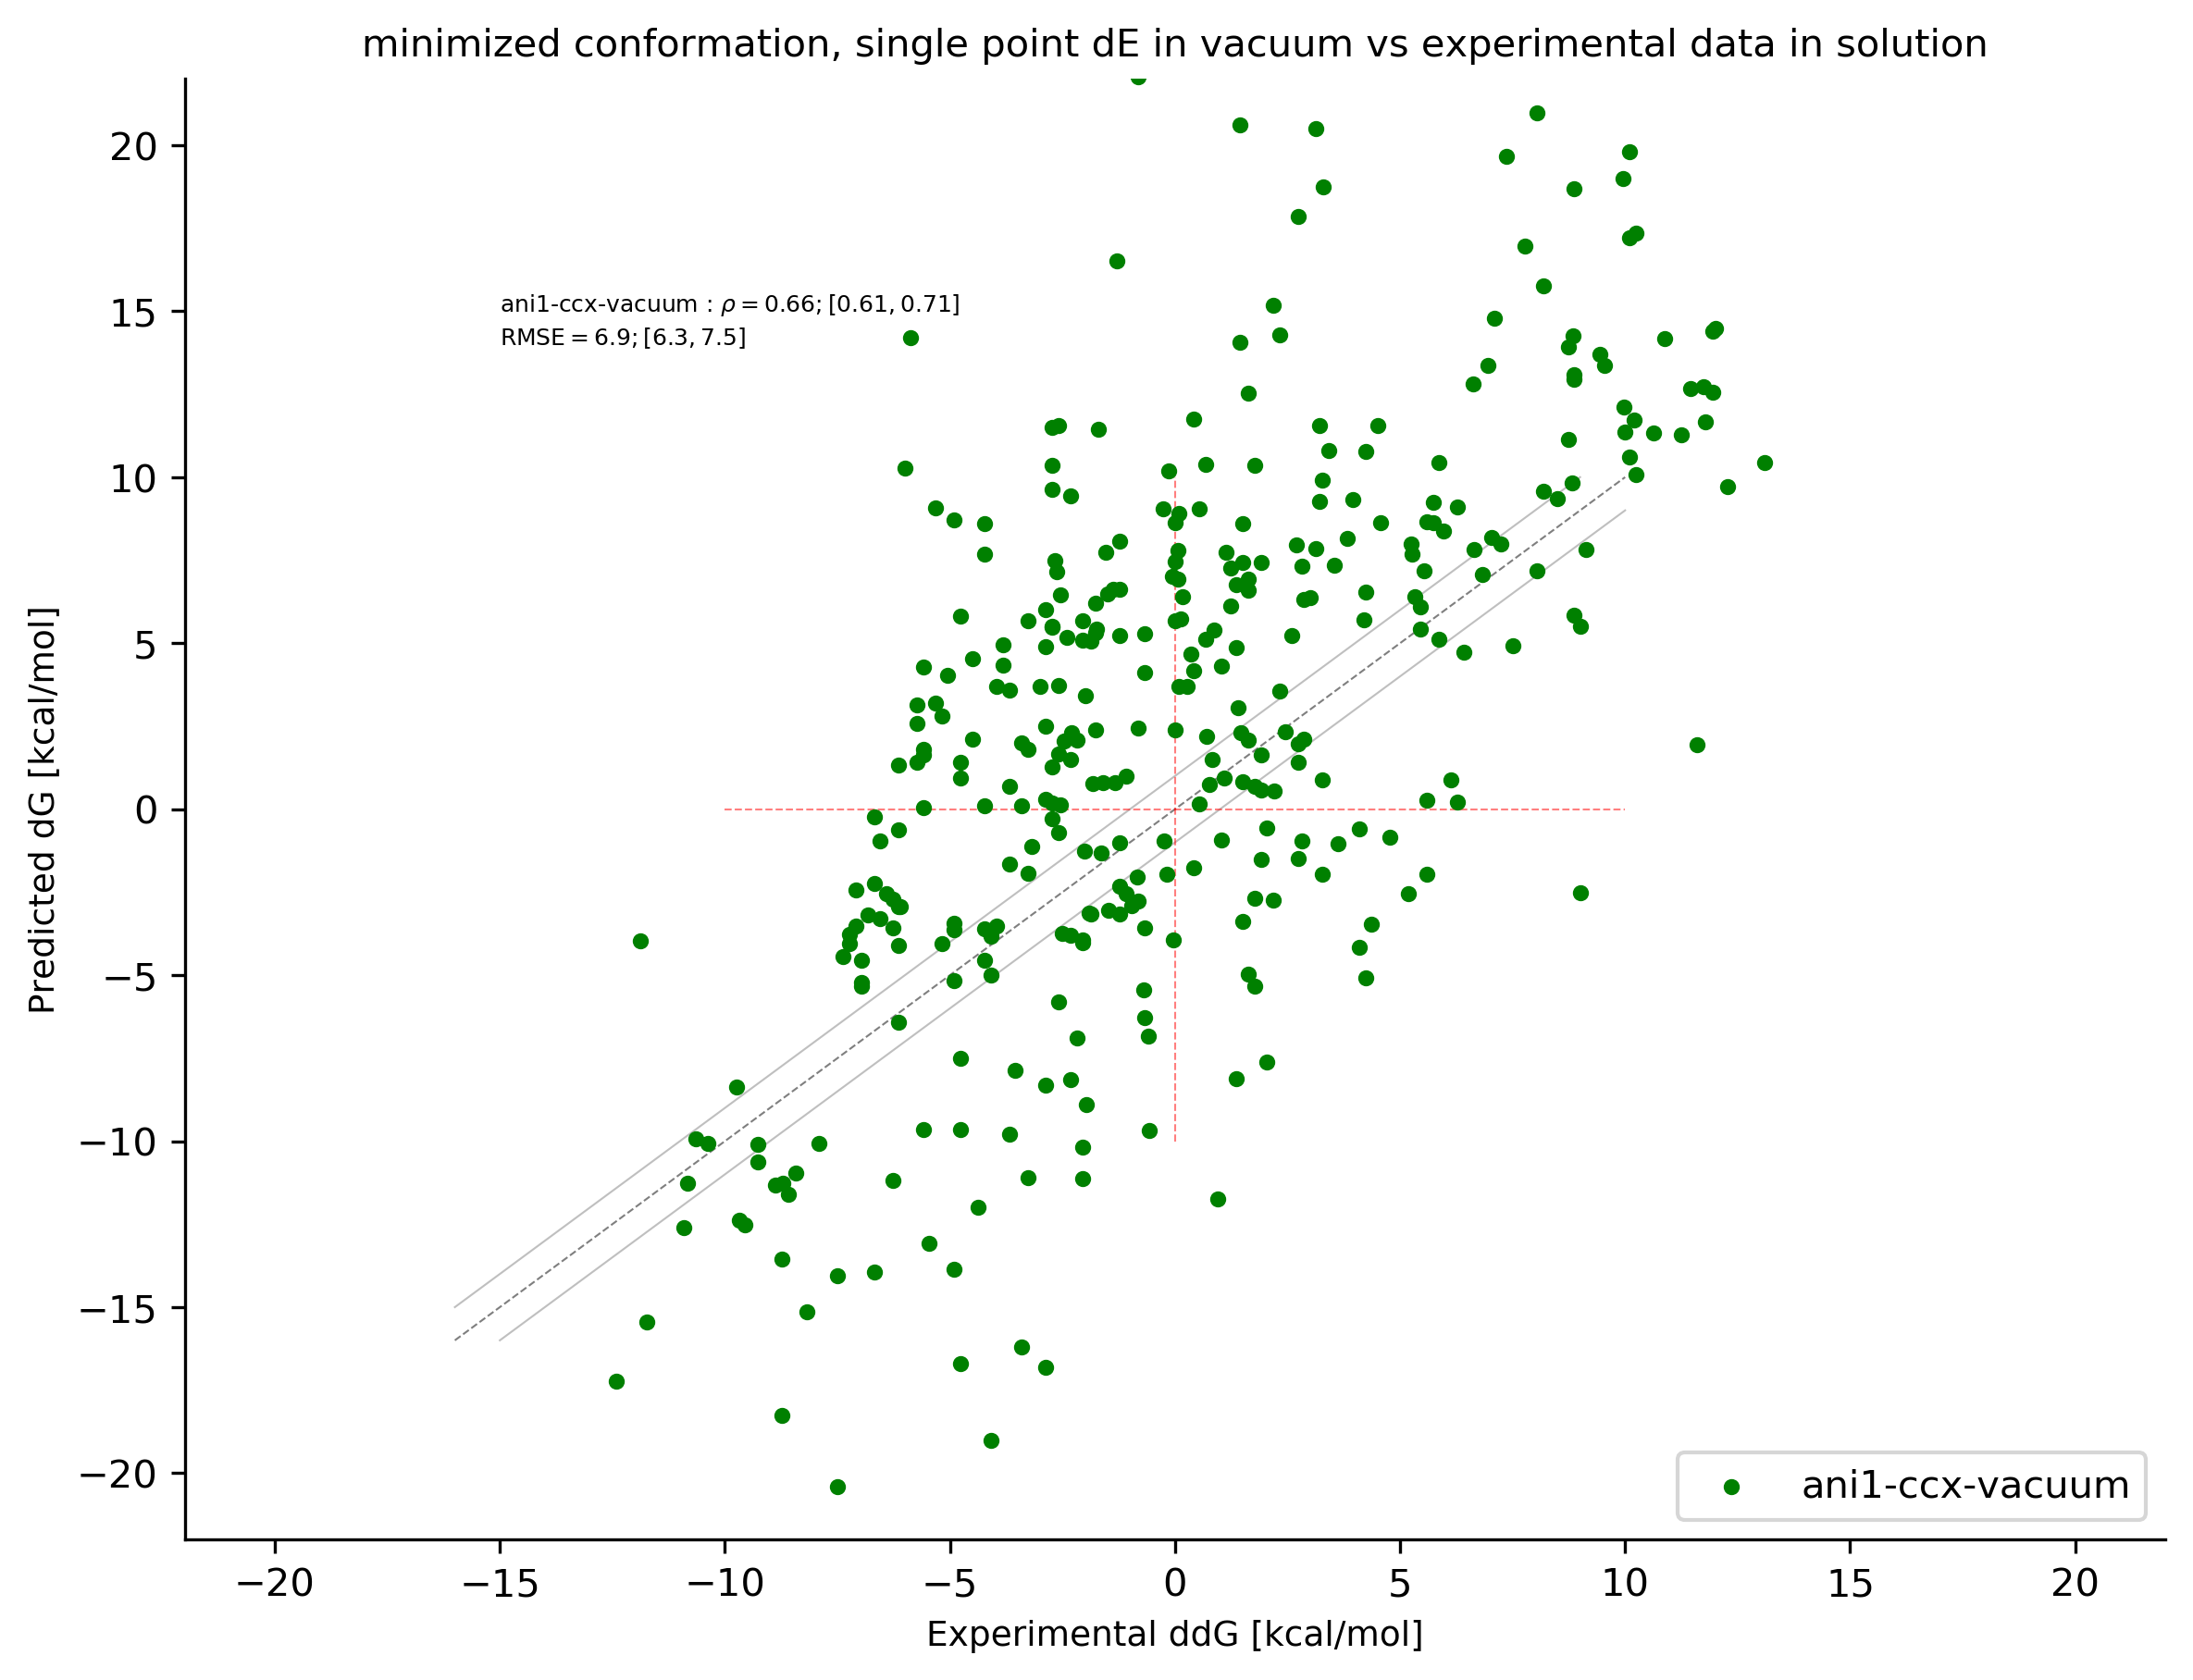

In [5]:
# dG ANI1-ccx vs experimental values
names = []
x_list = []
y_list = []

for a in list(results.dE_ani1ccx):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.experimental_values):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)


df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ani1-ccx-vacuum']*len(results.names))), columns =['names', 'predicted_values', 'experimental_values', 'method']) 
print(df)
f = plot_correlation_analysis(df, 'minimized conformation, single point dE in vacuum vs experimental data in solution', 'g', 'o')

             names  predicted_values  experimental_values           method
0    molDWRow_1005         -9.606354            -9.277240  ani1-ccx-vacuum
1    molDWRow_1182         11.672468             6.275780  ani1-ccx-vacuum
2    molDWRow_1001         -1.203860            -3.683610  ani1-ccx-vacuum
3    molDWRow_1424          4.148446             2.728600  ani1-ccx-vacuum
4    molDWRow_1411          4.317646            -3.001460  ani1-ccx-vacuum
..             ...               ...                  ...              ...
351   molDWRow_999         -3.085784            -7.230790  ani1-ccx-vacuum
352   molDWRow_853         15.550911             1.432515  ani1-ccx-vacuum
353   molDWRow_865          5.542379            -0.818580  ani1-ccx-vacuum
354    molDWRow_81          4.468945            -0.136430  ani1-ccx-vacuum
355   molDWRow_995          0.828422            -7.367220  ani1-ccx-vacuum

[356 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

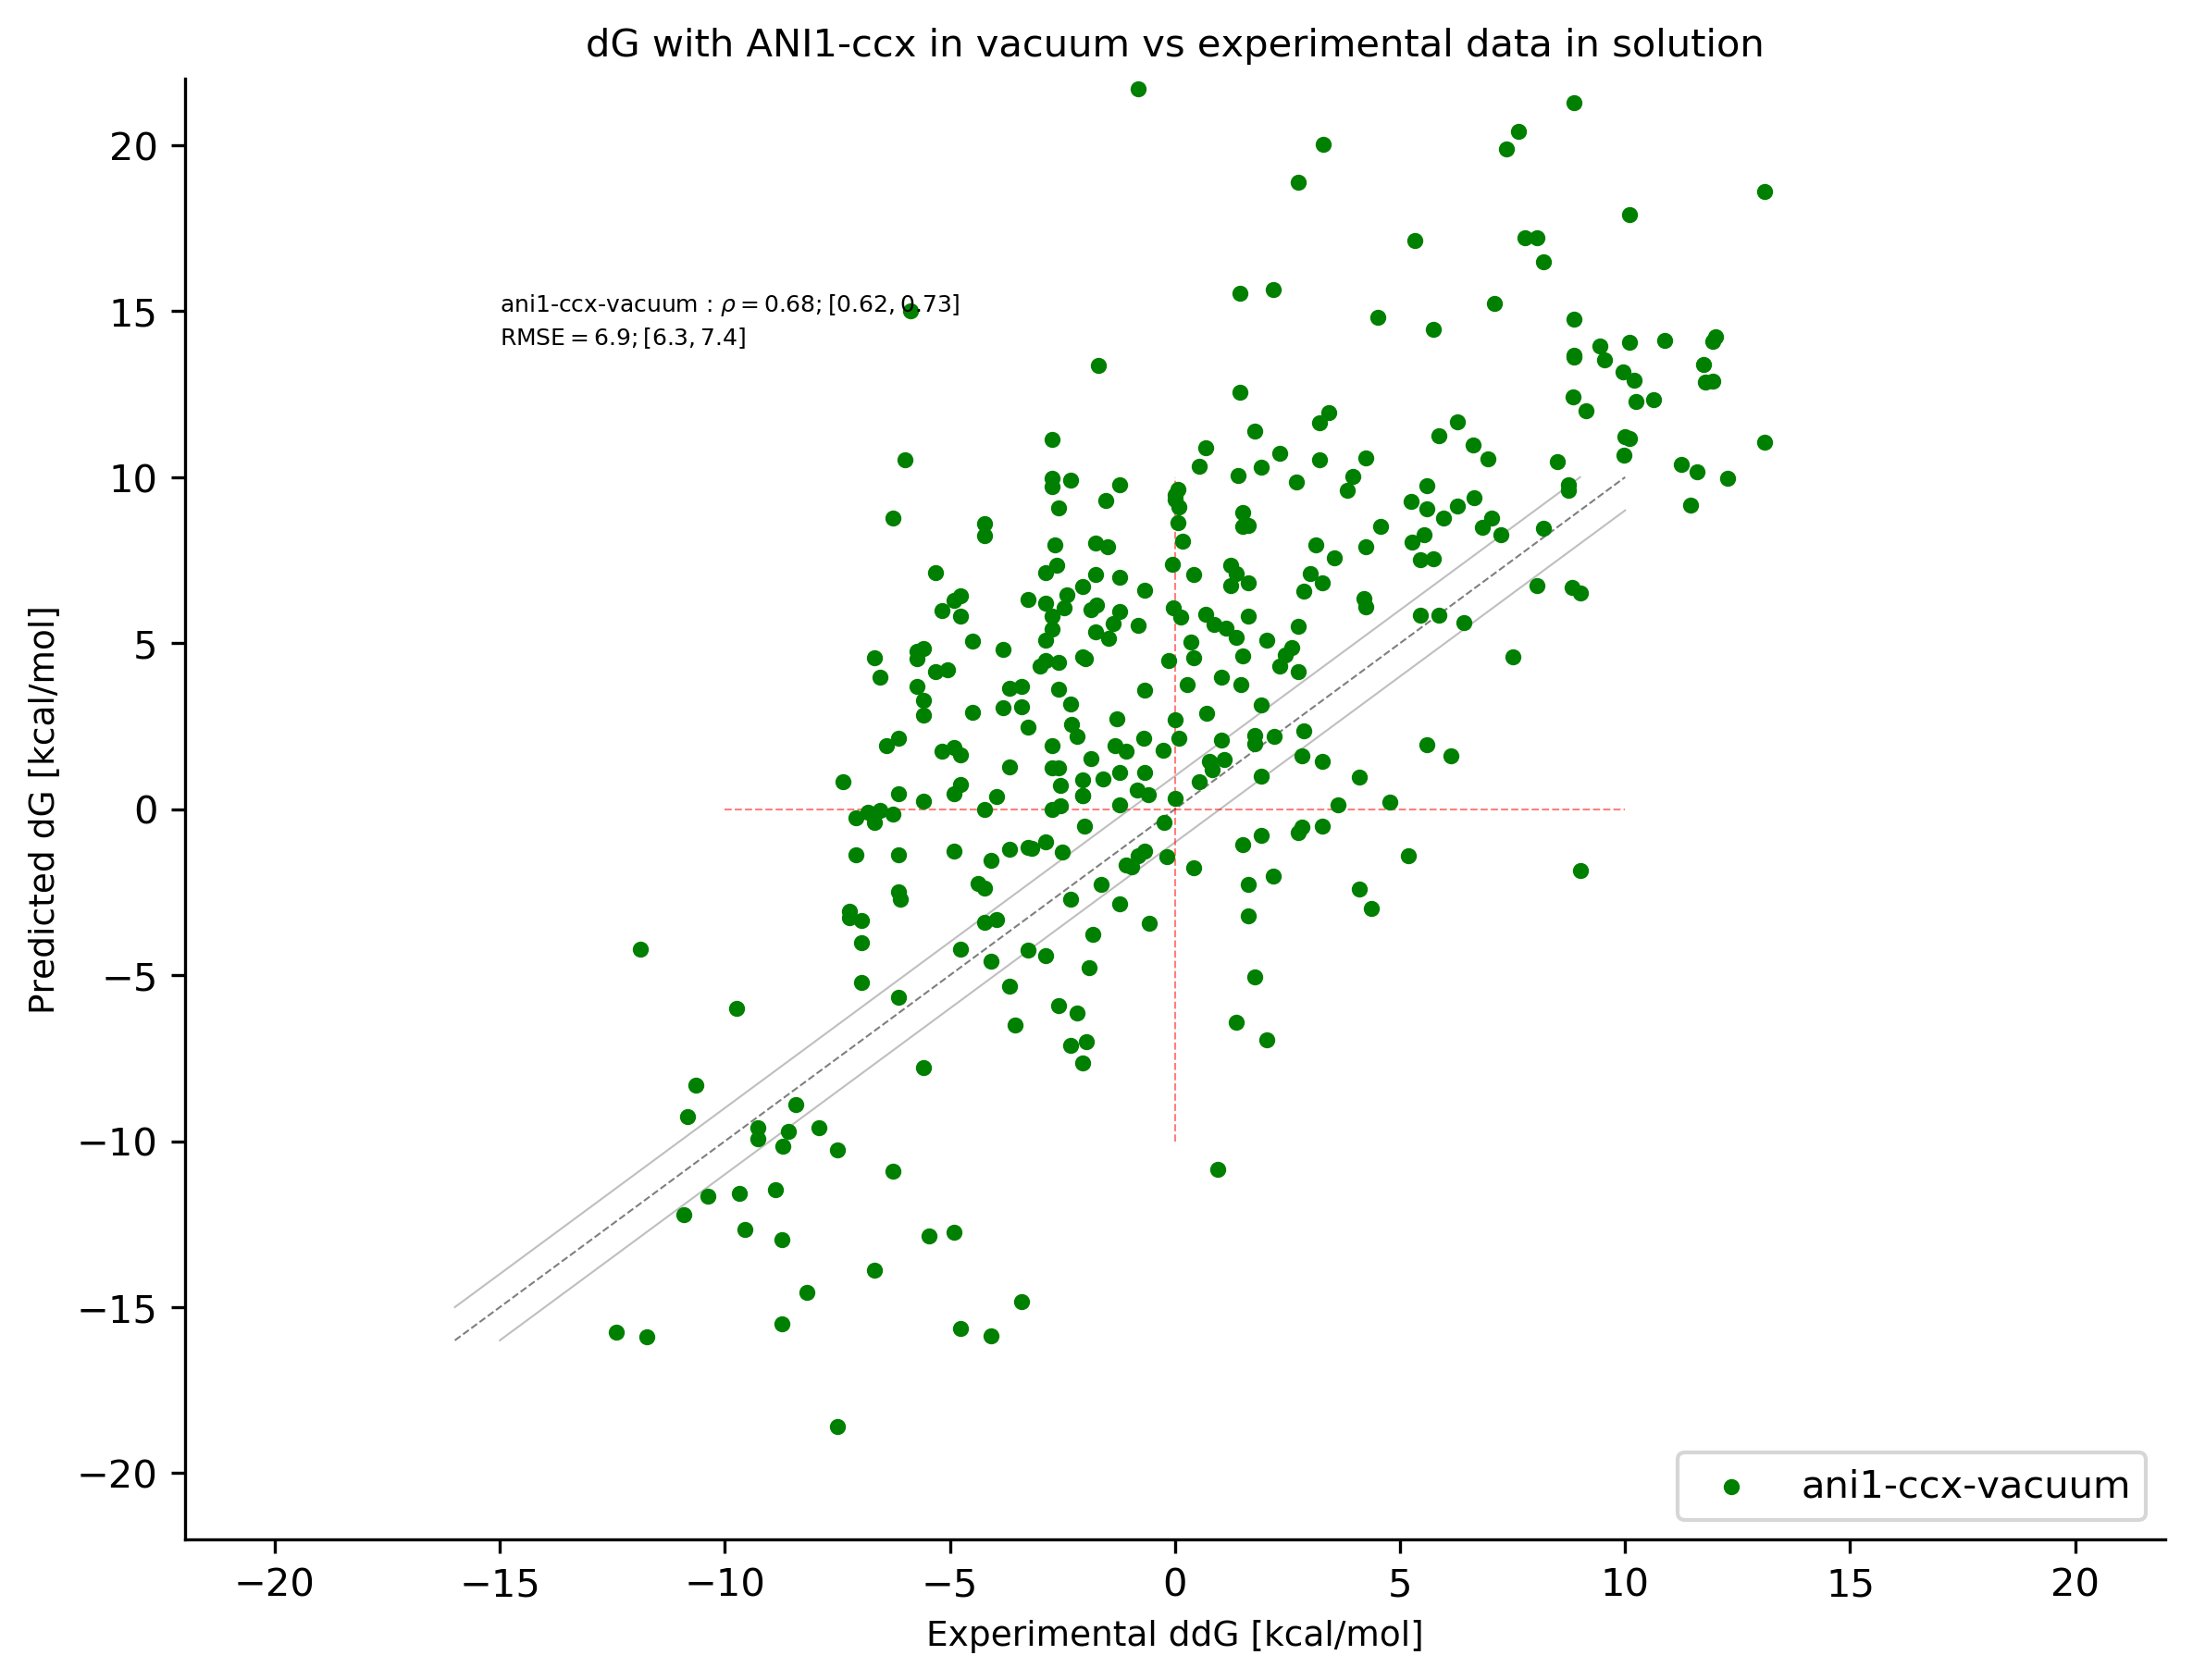

In [6]:
# dG ANI1-ccx vs experimental values
names = []
x_list = []
y_list = []

for a in list(results.dG_ani1ccx):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.experimental_values):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)


df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ani1-ccx-vacuum']*len(results.names))), columns =['names', 'predicted_values', 'experimental_values', 'method']) 
print(df)
f = plot_correlation_analysis(df, 'dG with ANI1-ccx in vacuum vs experimental data in solution', 'g', 'o')